In [4]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import pandas as pd
from shutil import copy2
import mpl_interactions.ipyplot as iplt

from pathlib import Path
%matplotlib ipympl

In [6]:
data_path = (
    Path.home()
    / "Washington State University (email.wsu.edu)"
    / "Carbon Lab Research Group - Documents"
    / "Synchrotron Logistics and Data"
    / "ALS - Berkeley"
    / "Data"
    / "BL1101"
    / "2023Nov"
    / "XRR"
    / "stats"
    / "2023 11 11"
)
mhz_data = data_path / "CCD Scan 82270" / "CCD"
khz_data = data_path / "CCD Scan 82271" / "CCD"

In [7]:
mhz_experiments = [exp.name for exp in mhz_data.iterdir() if exp.is_dir()]
khz_experiments = [exp.name for exp in khz_data.iterdir() if exp.is_dir()]
display(mhz_experiments)
display(khz_experiments)

['HOS 10 ET 0.001',
 'HOS 11 ET 0.001',
 'HOS 12 ET 0.001',
 'HOS 12 ET 0.01',
 'HOS 12 ET 0.1',
 'HOS 8 ET 0.001',
 'HOS 8.25 ET 0.001',
 'HOS 8.5 ET 0.001',
 'HOS 8.75 ET 0.001',
 'HOS 9 ET 0.001']

['HOS 10 ET 0.001',
 'HOS 11 ET 0.001',
 'HOS 12 ET 0.001',
 'HOS 12 ET 0.01',
 'HOS 12 ET 0.1',
 'HOS 8 ET 0.001',
 'HOS 8.25 ET 0.001',
 'HOS 8.5 ET 0.001',
 'HOS 8.75 ET 0.001',
 'HOS 9 ET 0.001']

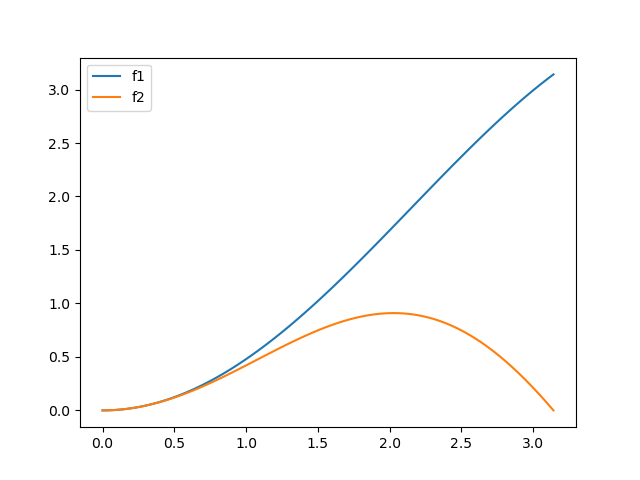

In [15]:
import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, np.pi, 100)
tau = np.linspace(0.5, 10, 100)


def f1(x, tau, beta):
    return np.sin(x * tau) * x * beta


def f2(x, tau, beta):
    return np.sin(x * beta) * x * tau


fig, ax = plt.subplots()
controls = iplt.plot(x, f1, tau=tau, beta=(1, 10, 100), label="f1")
iplt.plot(x, f2, controls=controls, label="f2")
_ = plt.legend()
plt.show()

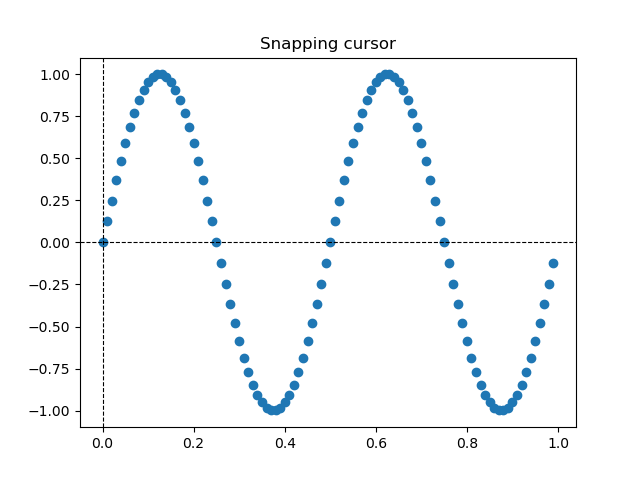

In [8]:
%matplotlib widget
class SnappingCursor:
    """
    A cross-hair cursor that snaps to the data point of a line, which is
    closest to the *x* position of the cursor.

    For simplicity, this assumes that *x* values of the data are sorted.
    """
    def __init__(self, ax, line):
        self.ax = ax
        self.horizontal_line = ax.axhline(color='k', lw=0.8, ls='--')
        self.vertical_line = ax.axvline(color='k', lw=0.8, ls='--')
        self.x, self.y = line.get_data()
        self._last_index = None
        # text location in axes coords
        self.text = ax.text(0.72, 0.9, '', transform=ax.transAxes)

    def set_cross_hair_visible(self, visible):
        need_redraw = self.horizontal_line.get_visible() != visible
        self.horizontal_line.set_visible(visible)
        self.vertical_line.set_visible(visible)
        self.text.set_visible(visible)
        return need_redraw

    def on_mouse_move(self, event):
        if not event.inaxes:
            self._last_index = None
            need_redraw = self.set_cross_hair_visible(False)
            if need_redraw:
                self.ax.figure.canvas.draw()
        else:
            self.set_cross_hair_visible(True)
            x, y = event.xdata, event.ydata
            index = min(np.searchsorted(self.x, x), len(self.x) - 1)
            if index == self._last_index:
                return  # still on the same data point. Nothing to do.
            self._last_index = index
            x = self.x[index]
            y = self.y[index]
            # update the line positions
            self.horizontal_line.set_ydata([y])
            self.vertical_line.set_xdata([x])
            self.text.set_text(f'x={x:1.2f}, y={y:1.2f}')
            self.ax.figure.canvas.draw()


x = np.arange(0, 1, 0.01)
y = np.sin(2 * 2 * np.pi * x)

fig, ax = plt.subplots()
ax.set_title('Snapping cursor')
line, = ax.plot(x, y, 'o')
snap_cursor = SnappingCursor(ax, line)
fig.canvas.mpl_connect('motion_notify_event', snap_cursor.on_mouse_move)
plt.show()